Decision Tree and Random Forest

In [1]:
import sys
sys.path.append('../libs')  # Update this path according to the location of your 'dataset' module

import dataset
import preprocessing
import classes
import numpy as np
import dataset
import preprocessing
import classes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


Import the Files and splita the data for training and test

In [2]:
# Load features
features = np.load("../Files/development_numpy/development.npy")

# Load labels
labels_df = pd.read_csv("../Files/metadata/development.csv")
#print(labels_df.head())
labels = labels_df['word'] 

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


Flatten the data for training

In [3]:
print("Shape of X_train:", X_train.shape)

# Flatten each sample into a one-dimensional array
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Check the new shape of the flattened arrays
print("New shape of X_train_flat:", X_train_flat.shape)

Shape of X_train: (36236, 175, 44)
New shape of X_train_flat: (36236, 7700)


Train Descision Tree Classifier and print result

In [6]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier with the flattened data
dt_classifier.fit(X_train_flat, y_train)

# Predict on the flattened test set
dt_predictions = dt_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))


Decision Tree Classifier Performance:
Accuracy: 0.7100441501103752
              precision    recall  f1-score   support

       Alarm       0.66      0.69      0.68       412
    Brötchen       0.59      0.60      0.59       379
   Fernseher       0.62      0.64      0.63       388
        Haus       0.74      0.72      0.73       432
     Heizung       0.68      0.71      0.69       403
     Leitung       0.73      0.70      0.72       425
       Licht       0.62      0.70      0.66       387
     Lüftung       0.73      0.73      0.73       423
        Ofen       0.53      0.59      0.55       388
       Radio       0.69      0.69      0.69       404
    Schraube       0.81      0.79      0.80       398
     Spiegel       0.84      0.84      0.84       387
 Staubsauger       0.74      0.76      0.75       368
          an       0.71      0.69      0.70       442
         aus       0.71      0.74      0.72       401
        kann       0.73      0.72      0.73       421
       nicht  

Try to find the best parameters to improve accuracy 

In [18]:
# Set up the parameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_flat, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the classifier with the best parameters
dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
dt_classifier.fit(X_train_flat, y_train)

# Predict on the test set
dt_predictions = dt_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Tuned Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print(classification_report(y_test, dt_predictions))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters: {'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 10}
Tuned Decision Tree Classifier Performance:
Accuracy: 0.7162251655629139
              precision    recall  f1-score   support

       Alarm       0.64      0.73      0.68       412
    Brötchen       0.58      0.61      0.59       379
   Fernseher       0.62      0.68      0.65       388
        Haus       0.74      0.74      0.74       432
     Heizung       0.67      0.70      0.69       403
     Leitung       0.70      0.71      0.70       425
       Licht       0.62      0.69      0.65       387
     Lüftung       0.73      0.74      0.73       423
        Ofen       0.55      0.60      0.57       388
       Radio       0.66      0.71      0.69       404
    Schraube       0.77      0.79      0.78       398
     Spiegel       0.86      0.85      0.85       387
 Staubsauger       0.79      0.77      0.78       368
          an       0.74  

In [20]:
# Train the classifier with best parameters and cost complexity pruning
dt_classifier_pruned = DecisionTreeClassifier(**best_params, random_state=42, ccp_alpha=0.01)  # Adjust ccp_alpha based on validation curve analysis
dt_classifier_pruned.fit(X_train_flat, y_train)

# Predict on the test set
dt_pruned_predictions = dt_classifier_pruned.predict(X_test_flat)

# Evaluate the classifier
print("Pruned Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, dt_pruned_predictions))
print(classification_report(y_test, dt_pruned_predictions))

Pruned Decision Tree Classifier Performance:
Accuracy: 0.40927152317880794
              precision    recall  f1-score   support

       Alarm       0.00      0.00      0.00       412
    Brötchen       0.41      0.32      0.36       379
   Fernseher       0.00      0.00      0.00       388
        Haus       0.71      0.63      0.67       432
     Heizung       0.00      0.00      0.00       403
     Leitung       0.00      0.00      0.00       425
       Licht       0.00      0.00      0.00       387
     Lüftung       0.63      0.56      0.59       423
        Ofen       0.00      0.00      0.00       388
       Radio       0.67      0.49      0.57       404
    Schraube       0.76      0.52      0.61       398
     Spiegel       0.52      0.68      0.59       387
 Staubsauger       0.43      0.48      0.46       368
          an       0.35      0.64      0.45       442
         aus       0.80      0.46      0.58       401
        kann       0.00      0.00      0.00       421
      

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [5]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

Random Forest Classifier Performance:
Accuracy: 0.9108167770419426
              precision    recall  f1-score   support

       Alarm       0.88      0.94      0.91       412
    Brötchen       0.96      0.92      0.94       379
   Fernseher       0.95      0.93      0.94       388
        Haus       0.88      0.88      0.88       432
     Heizung       0.96      0.95      0.95       403
     Leitung       0.95      0.92      0.94       425
       Licht       0.89      0.89      0.89       387
     Lüftung       0.96      0.92      0.94       423
        Ofen       0.76      0.75      0.75       388
       Radio       0.95      0.95      0.95       404
    Schraube       0.95      0.96      0.95       398
     Spiegel       0.95      0.96      0.96       387
 Staubsauger       0.98      0.95      0.96       368
          an       0.88      0.92      0.90       442
         aus       0.86      0.86      0.86       401
        kann       0.92      0.86      0.89       421
       nicht  

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_flat, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the classifier with the best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Tuned Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Fitting 3 folds for each of 810 candidates, totalling 2430 fits


In [7]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 200,
    'max_features': 'auto',
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'bootstrap': True
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=30, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [8]:
# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Performance:
Accuracy: 0.9132450331125828
              precision    recall  f1-score   support

       Alarm       0.89      0.93      0.91       412
    Brötchen       0.97      0.92      0.94       379
   Fernseher       0.94      0.92      0.93       388
        Haus       0.88      0.89      0.88       432
     Heizung       0.96      0.95      0.95       403
     Leitung       0.97      0.92      0.94       425
       Licht       0.91      0.88      0.89       387
     Lüftung       0.95      0.95      0.95       423
        Ofen       0.78      0.75      0.76       388
       Radio       0.96      0.95      0.95       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.94      0.97      0.95       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.89      0.91      0.90       442
         aus       0.87      0.86      0.86       401
        kann       0.91      0.88      0.89       421
       nicht  

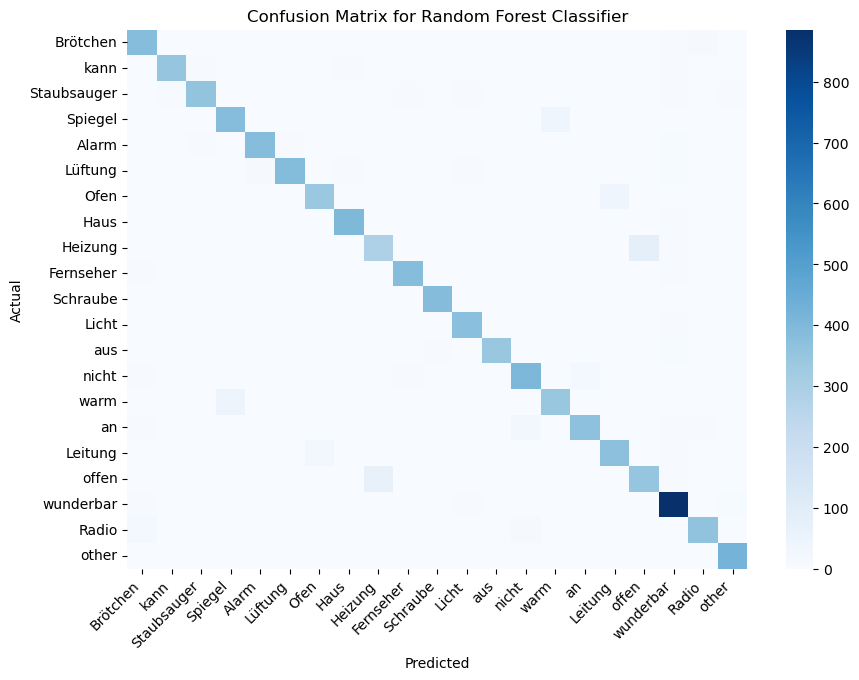

In [32]:
# Generate the confusion matrix
confmat = confusion_matrix(y_test, rf_predictions)

# Load labels
y_labels = pd.read_csv("../Files/metadata/development.csv")['word']

# Define class names (replace with actual class names from your dataset)
classes = y_labels.unique().tolist()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(confmat, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')


# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()

In [7]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train_flat, y_train)

# Find the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Train the classifier with the best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Tuned Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



Fitting 3 folds for each of 144 candidates, totalling 432 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Tuned Random Forest Classifier Performance:
Accuracy: 0.9247240618101545
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.90      0.90      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.91      0.87      0.89       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.78      0.77      0.78       388
       Radio       0.97      0.95      0.96       404
    Schraube       0.95      0.97      0.96       398
     Spiegel       0.95      0.97      0.96       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.91      0.92      0.91       442
         aus       0.88      0.89      0.89       401
        kann       0.93      0.89      0.91       421
       n

In [8]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 200,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_features='auto',
                       min_samples_split=5, n_estimators=200, random_state=42)

In [9]:
# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



Random Forest Classifier Performance:
Accuracy: 0.9247240618101545
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.90      0.90      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.91      0.87      0.89       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.78      0.77      0.78       388
       Radio       0.97      0.95      0.96       404
    Schraube       0.95      0.97      0.96       398
     Spiegel       0.95      0.97      0.96       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.91      0.92      0.91       442
         aus       0.88      0.89      0.89       401
        kann       0.93      0.89      0.91       421
       nicht  

In [6]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 300,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9271523178807947
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.94      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.91      0.90      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.95      0.96       425
       Licht       0.92      0.88      0.90       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.98      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.96      0.97      0.96       387
 Staubsauger       0.99      0.95      0.97       368
          an       0.91      0.92      0.91       442
         aus       0.88      0.90      0.89       401
        kann       0.93      0.90      0.92       421
       nicht  

In [17]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 400,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9280353200883003
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.95      0.96       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.92      0.89      0.91       387
     Lüftung       0.98      0.96      0.97       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.99      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [18]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 400,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9275938189845475
              precision    recall  f1-score   support

       Alarm       0.91      0.94      0.93       412
    Brötchen       0.98      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.90      0.88      0.89       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.97      0.95      0.96       425
       Licht       0.92      0.90      0.91       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.98      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.95      0.97      0.96       387
 Staubsauger       0.98      0.95      0.96       368
          an       0.92      0.93      0.93       442
         aus       0.87      0.89      0.88       401
        kann       0.94      0.90      0.92       421
       nicht  

In [19]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 500,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 10,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9280353200883003
              precision    recall  f1-score   support

       Alarm       0.91      0.95      0.93       412
    Brötchen       0.98      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.90      0.88      0.89       432
     Heizung       0.97      0.98      0.97       403
     Leitung       0.98      0.95      0.96       425
       Licht       0.92      0.91      0.91       387
     Lüftung       0.97      0.95      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.98      0.96      0.97       404
    Schraube       0.96      0.97      0.96       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.94      0.96       368
          an       0.92      0.93      0.92       442
         aus       0.87      0.90      0.88       401
        kann       0.94      0.91      0.92       421
       nicht  

In [20]:

# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 500,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9292494481236203
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.94       412
    Brötchen       0.97      0.96      0.96       379
   Fernseher       0.97      0.95      0.96       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.94      0.96       425
       Licht       0.92      0.89      0.90       387
     Lüftung       0.98      0.96      0.97       423
        Ofen       0.79      0.78      0.79       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.96       387
 Staubsauger       0.99      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [21]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 600,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9291390728476822
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.95      0.97       425
       Licht       0.92      0.89      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.80      0.78      0.79       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [22]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 700,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9286975717439293
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.93       412
    Brötchen       0.98      0.95      0.96       379
   Fernseher       0.96      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.96      0.97      0.97       403
     Leitung       0.99      0.95      0.97       425
       Licht       0.92      0.89      0.90       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.78      0.78       388
       Radio       0.97      0.97      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.92       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [23]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 800,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9292494481236203
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.93       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.96      0.95      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.96      0.97       425
       Licht       0.92      0.90      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.77      0.78       388
       Radio       0.97      0.96      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.92      0.93      0.93       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

In [ ]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 900,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Evaluate the classifier
accuracy = accuracy_score(y_test, rf_predictions)
report = classification_report(y_test, rf_predictions, digits=4)

print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(report)

# Generate the confusion matrix
confmat = confusion_matrix(y_test, rf_predictions)

# Load labels
y_labels = pd.read_csv("../Files/metadata/development.csv")['word']

# Define class names (replace with actual class names from your dataset)
classes = y_labels.unique().tolist()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(confmat, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')


# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [25]:
# Define your best parameters if you have already tuned them
best_params = {
    'n_estimators': 1100,
    'max_features': 'auto',
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'bootstrap': False
}

# Initialize the Random Forest Classifier with best parameters
rf_classifier = RandomForestClassifier(**best_params, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_flat, y_train)

# Predict on the test set
rf_predictions = rf_classifier.predict(X_test_flat)

# Evaluate the classifier
print("Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Generate the confusion matrix
confmat = confusion_matrix(y_test, rf_predictions)

# Load labels
y_labels = pd.read_csv("../Files/metadata/development.csv")['word']

# Define class names (replace with actual class names from your dataset)
classes = y_labels.unique().tolist()

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(confmat, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Random Forest Classifier')


# Save the confusion matrix as a PNG file
plt.savefig('confusion_matrix.png')

plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest Classifier Performance:
Accuracy: 0.9291390728476822
              precision    recall  f1-score   support

       Alarm       0.92      0.95      0.94       412
    Brötchen       0.97      0.95      0.96       379
   Fernseher       0.97      0.94      0.95       388
        Haus       0.91      0.89      0.90       432
     Heizung       0.97      0.97      0.97       403
     Leitung       0.98      0.95      0.96       425
       Licht       0.92      0.89      0.91       387
     Lüftung       0.97      0.96      0.96       423
        Ofen       0.79      0.78      0.78       388
       Radio       0.98      0.97      0.97       404
    Schraube       0.96      0.97      0.97       398
     Spiegel       0.96      0.97      0.97       387
 Staubsauger       0.98      0.95      0.97       368
          an       0.93      0.93      0.93       442
         aus       0.88      0.90      0.89       401
        kann       0.94      0.90      0.92       421
       nicht  

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
